LMS EXP 09_Aiffel
<br/>**9. 영화리뷰 텍스트 감성분석하기**

**개발 환경**
* 라이브러리
<br/>Keras, MeCab, KoNLPy, Genism
* 버전 확인
* Colab GPU

**데이터 정보**
<br/>**데이터 수집**
<br/>**데이터로더 구성**
* 정제
* 토큰화
* 단어 인덱스 생성
* 정수 인코딩

**데이터 분석 및 가공**
* 데이터셋 내 문장 길이 분포
* 적절한 최대 문장 길이 지정
* 패딩 추가

**validation set 구성**
* LSTM
* BiLSTM with Attention mechanism
* Transformer

**모델 훈련**
* LSTM
<br/>학습된 임베딩 레이어
<br/>한국어 Word2Vec 임베딩 레이어
* BiLSTM with Attention mechanism
* Transformer

**결론**
<br/>**참고문헌**

# 개발 환경

##라이브러리

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

**pandas**는 행과 열로 이루어진 데이터 객체를 만들어 안정적으로 대용량의 데이터들을 처리한다.

**numpy**는 array 단위로 벡터와 행렬을 계산한다.

**Collections**의 **Counter**는 합산하는 기능을 하는 데이터 처리 라이브러리이다.

 **matplotlib**은 시각화를 한다.

###Keras

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

**Keras**는 **Tensorflow**위에서 동작하는 라이브러리이다.
<br/>Keras는 high level API로서 딥러닝의 기본 연산을 한다.
<br/>딥러닝 프레임워크 Tensorflow, Theano, CNTK를 backend로 사용하여 연산 작업을 수행한다.

**Tokenizer**는 문장으로부터 단어를 토큰화하고 숫자에 대응시키는 딕셔너리를 사용할 수 있게 한다.
<br/>**pad_sequences**는 특정 값을 채워서 데이터의 크기(shape)를 조정한다.

**Initializers**는 케라스 layer의 파라미터 초기값을 어떤 방식으로 생성할 것인지를 결정한다.
<br/>Initializers의 **Constant**는 지정한 파라미터를 특정한 상수 Constant의 값(Value)을 생성한다.

Callbacks 함수 **EarlyStopping**은 검증 세트에서의 손실이 더 이상 감소하지 않으면 학습을 중단한다.
<br/>**ModelCheckpoint**은 모델을 학습시키는 동안 에포크마다 자동으로 저장한다.

 **keras.models.Model**은 Multi input/output을 다루기 때문에
 <br/>선형적 흐름(Sequential API)이 아닌 모델 설계의 경우도 가능하다.
 <br/>**load_model**은 Keras의 모델을 지원한다.


###MeCab

In [ ]:
import os
# install konlpy, jdk, JPype
!pip install konlpy
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip3 install JPype1-py3

# install mecab-ko
os.chdir('/tmp/')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
!tar zxfv mecab-0.996-ko-0.9.2.tar.gz
os.chdir('/tmp/mecab-0.996-ko-0.9.2')
!./configure
!make
!make check
!make install

# install mecab-ko-dic
!apt-get install automake
os.chdir('/tmp')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.1.1-20180720.tar.gz
!tar -zxvf mecab-ko-dic-2.1.1-20180720.tar.gz
os.chdir('/tmp/mecab-ko-dic-2.1.1-20180720')
!./autogen.sh
!./configure
!make
!make install

# install mecab-python
os.chdir('/content')
!git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
os.chdir('/content/mecab-python-0.996')
!python3 setup.py build
!python3 setup.py install

**Mecab**은 NTT(일본 통신)에서 배포하는 오픈소스 일본어 형태소 분석기이다.
<br/>GPL/LGPL/BSD 라이센스를 따른다.

Mecab은 언어, 사전 코퍼스에 의존하지 않는 범용적인 설계가 가능하다.
<br/>새로운 단어를 추가해도 형태소 분석기가 작동한다.
<br/>CRF 채용하여 HMM 보다 성능이 향상되었다.
<br/>즉, 띄어쓰기의 정확도가 개선됐다.

###MeCab-Ko

**MeCab-ko**은 은전한닢 프로젝트에서 MeCab 엔진이 일본어와 한국어의 유사점으로 인해
<br/>한글 분석에도 동작하는 것을 확인하고 개발한 한국어 형태소 분석기이다.
<br/>MeCab은 보통 일본어 형태소 분석에 사용되지만, 코퍼스로부터 bigram 모델을 학습하기 때문에 
<br/>학습용 데이터와 분석 사전을 준비하면 특정 언어에 종속되지 않고 사용할 수 있다. 

은전한닢 프로젝트 검색 엔진 색인기에서 쓸 수 있는 적당한 품질과 속도
<br/>자유로운 라이센스를 지향하는 한국어 형태소 분석기 프로젝트이다.

**mecab-ko-dic**의 오픈 소스 형태소 분석 엔진인 MeCab을 사용한다.
<br/>말뭉치 학습과 사전 목록 일부는 21세기 세종계획의 성과물을 사용하였다.
<br/>총 23,615 문장으로 구성된다.

###MeCab-Python

Mecab 형태소 분석기는 Java 언어로 구현된 라이브러리이다.
<br/>그러므로 파이썬에서 작동시키려면 파이썬에서 자바 언어를 해석할 수 있어야 한다.
<br/>이를 위해 JDK에 속하는 **Java SE Development Kit**과 **Jpype**를 설치한다.

**JDK(Java Development Kit)**는 Java로 소프트웨어를 개발할 수 있도록 여러 기능들을 제공하는 패키지(키트)이다.
<br/>JDK는 컴파일러와 클래스 라이브러리(Class Library)를 포함하는, 자바 플랫폼 사양서를 구현한다.
<br/>**Java SE(Java Platform , Standard Edition)**는 표준 자바 플랫폼으로
<br/>표준적인 컴퓨팅 환경을 지원하기 위한 자바 가상머신 규격 및 API 집합을 포함한다.
<br/>**JPype**를 이용하면 python 에서 java 라이브러리 작동이 가능하다.
<br/>Java의 코드를 컴파일하고 jar 아카이브로 만들어놓으면 python 함수로 재탄생시킬 수 있다.
<br/>

###KoNLPy

In [ ]:
import konlpy

In [ ]:
from konlpy.tag import Okt
from konlpy.tag import Mecab

**KoNLPy**는 한국어 정보처리를 위한 오픈소스 라이브러리이다.
<br/>**Okt(Open Korean Text)**는 한국어 트위터 형태소 분석기이다.
<br/>**Mecab**은 일본어 형태소 분석기를 기반으로 한 한국어 형태소 분석기이다.



KoNLPy는 다음과 같은 다양한 형태소 분석, 태깅 라이브러리를 파이썬에서 쉽게 사용할 수 있도록 모아놓았다.
<br/>[Hannanum(한나눔)](http://semanticweb.kaist.ac.kr/hannanum/)
<br/>[Kkma(꼬꼬마)](http://kkma.snu.ac.kr/)
<br/>[Komoran(코모란)](https://github.com/shin285/KOMORAN)
<br/>[Mecab(메카브)](https://bitbucket.org/eunjeon/mecab-ko)
<br/>[Open Korean Text(트위터 형태소 분석기)](https://github.com/open-korean-text/open-korean-text)

그 외 형태소 분석기로 Lucene(루씬), KLT, Khaiii가 있다.

Google Colab Notebook은 **KoNLPy**를 편리하게 사용할 수 있는 개발 환경을 제공한다.
<br/>반면 로컬 환경에서 사용하기 위해서는 설치경로 설정과 컴파일러 설치 등 까다로운 조건이 많다.

**KoNLPy**에서 사용한 형태소 분석기들은 C++, Java 등 다른 환경에서 만들어져
<br/>Windows, Mac OS에서 제공되지 않는 경우가 있기 때문이다.
<br/>Google Colab Notebook은 그 KoNLPy의 제약 조건 없이 환경 구축이 필요없는 파이썬 웹 서비스이다.

Google Colab이 아닌 다른 개발 환경일 시에
<br/>[KoNLPy 공식 홈페이지](https://konlpy.org/en/latest/install/)의 설치 방법을 따른다.

###Genism

In [ ]:
import gensim
from gensim.models import KeyedVectors
from gensim.models.keyedvectors import Word2VecKeyedVectors

**gensim**은 자연어를 벡터로 변환하는데 필요한 기능을 제공하고 있는 오픈소스 라이브러리이다.
<br/>단어 및 텍스트 유사성 모델링((LDA)을 위한 패키지로 Topic Model로 시작하여 <br/>SVD 및 neural 단어 표현으로 발전했다.

**KeyedVectors**는 word vector를 저장하고 query한다.
<br/>query는 데이터베이스에게 특정한 데이터를 보여달라는 클라이언트(사용자)의 요청을 말한다. 

**Word2VecKeyedVectors**는 keys와 vector의 관계를 mapping한다.

##버전 확인

In [ ]:
print(pd.__version__)
print(np.__version__)
print(keras.__version__)
print(konlpy.__version__)
print(gensim.__version__)

1.3.5
1.21.6
2.8.0
0.6.0
3.6.0


어떤 버전의 모듈이 설치되었는지 확인하는 작업은 중요하다.
<br/>새로운 기능이 추가되고 일부는 더 이상 사용되지 않으므로
<br/>이러한 변경 사항을 인식하지 못하면 오류가 발생할 수 있다. 


genism이 3.6.0 이상이어야 Word2Vec이 작동한다.

##Colab GPU

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat May 28 18:36:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Google Colab에서 할당된 GPU를 확인한다.

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


고용량 메모리 VM에 액세스한다.

#데이터 정보

[Naver sentiment movie corpus v1.0](https://github.com/e9t/nsmc)

네이버 영화 리뷰 댓글을 웹크롤링한 한국어 말뭉치 데이터셋이다.



데이터셋 구축 과정은 [Large Movie Review Dataset v1.0](https://ai.stanford.edu/~amaas/data/sentiment/)의 구성 방식에 기초한다. 
<br/>Large Movie Review Dataset은 IMDB에서 영화 5만편의 작품 리뷰를 웹크롤링한 말뭉치 데이터셋이다.
<br/>그 중에 훈련 데이터로 쓰일 2만5천개의 리뷰, 테스트 데이터로 쓰일 2만5천개의 리뷰로 구성된다.
<br/>그리고 긍정적인 리뷰 2만5천개, 부정적인 리뷰 2만5천개로 구성된다.

데이터셋 분석 결과를 통해 논문 Learning Word Vectors for Sentiment Analysis을 작성했다.
<br/>이 데이터로 학습시킨 모델의 성능은 88.89%의 정확도에 달한다.

Naver sentiment movie corpus v1.0은 훈련 데이터로 쓰일 15만개의 리뷰,
<br/>테스트 데이터로 쓰일 5만개의 리뷰로 구성된다.
<br/>그리고 긍정적인 리뷰 1만개, 부정적인 리뷰 1만개로 구성된다.

모든 리뷰의 글자수는 140자 이하이다.
<br/>긍정과 부정의 수치는 1부터 10까지로 정수로 부여한다.
<br/>중립적인 의견의 리뷰는 데이터셋에서 제외한다.

# 데이터 수집

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = pd.read_table('/content/drive/MyDrive/LMS/film_review/ratings_train.txt')
test_data = pd.read_table('/content/drive/MyDrive/LMS/film_review/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
print('훈련 데이터 샘플수 :', (len(train_data)))
print('테스트 데이터 샘플수 :', (len(test_data)))

훈련 데이터 샘플수 : 150000
테스트 데이터 샘플수 : 50000


 # 데이터로더 구성

nsmc 텍스트를 가공하여 load_data 메서드를 호출하면
<br/>숫자 인덱스로 변환된 텍스트와 word_to_index 딕셔너리까지 제공하는 데이터 로더이다.

In [ ]:
tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) 
        temp_X = [word for word in temp_X if not word in stopwords] 
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence)
        temp_X = [word for word in temp_X if not word in stopwords]
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index

###정제

drop_duplicates는 데이터의 중복을 제거한다.
<br/>dropna는 NaN 결측치를 제거한다.

###토큰화


tokenizer는 Mecab 형태소 분석기를 이용해 토큰화하고
<br/>불용어(Stopwords)는 토큰화에 포함시키지 않는다.

###단어 인덱스 생성

concatenate는 단어 numpy 배열을 하나로 합친다.
 <br/>counter는 단어의 수를 합산한다.
 <br/>enumerate는 반복문 사용 시 몇 번째 반복문인지 확인한다.
 <br/>이를 통해 단어 사전 word_to_index를 구성한다.
 <br/>텍스트 스트링을 사전 인덱스 스트링으로 변환한다.

In [ ]:
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data) 

데이터 로더를 작동시킨다.

In [ ]:
index_to_word = {index:word for word, index in word_to_index.items()}

단어의 인덱스를 생성한다.

###정수 인코딩

In [ ]:
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수이다. 
<br/>단, 모든 문장은 <BOS>로 시작하는 것으로 한다.

In [ ]:
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수이다. 

In [ ]:
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

숫자 벡터로 encode된 문장을 원래대로 decode하는 함수이다. 

In [ ]:
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수이다. 

#데이터 분석 및 가공

##데이터셋 내 문장 길이 분포

In [ ]:
total_data_text = list(X_train) + list(X_test)
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

In [ ]:
print('문장 개수 : ',  len(num_tokens))
print('최소 길이 : ', np.max(num_tokens))
print('최대 길이 : ', np.max(num_tokens))
print('평균 : ', np.mean(num_tokens))
print('표준편차 : ', np.std(num_tokens))

문장 개수 :  195339
최소 길이 :  116
최대 길이 :  116
평균 :  15.96940191154864
표준편차 :  12.843571191092


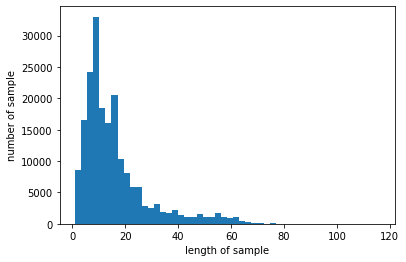

In [ ]:
plt.hist([s for s in num_tokens if s >= 1], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

최대 : 116
평균 : 15.96940191154864
중앙값 : 12.0


<function matplotlib.pyplot.show>

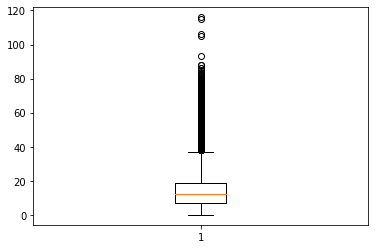

In [ ]:
print('최대 : {}'.format(np.max(num_tokens)))
print('평균 : {}'.format(np.mean(num_tokens)))
print('중앙값 : {}'.format(np.median(num_tokens)))

plt.boxplot(num_tokens)
plt.show

##적절한 최대 문장 길이 지정

text와 headlines의 최소, 최대, 평균 길이를 구하고 또한 길이 분포를 시각화한다.
<br/>text의 경우 최소 길이가 1, 최대 길이가 100, 평균 길이는 38로
대체적으로는 100 내외의 길이를 가진다는 것을 파악한다.
<br/>이로부터 text의 최대 길이를 정한다.


In [ ]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
text_max_len = int(max_tokens)
print('pad_sequences maxlen : ', text_max_len)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

pad_sequences maxlen :  41
전체 문장의 0.9342988343341575%가 maxlen 설정값 이내에 포함됩니다. 


이 길이를 선택했을 때, 얼마나 많은 샘플들을 자르지 않고 포함할 수 있는지 통계로 확인한다.

##패딩 추가

서로 다른 길이의 샘플들을 병렬 처리하기 위해 같은 길이로 맞춰주는 패딩 작업을 한다.

훈련 샘플의 최대 길이로 패딩한다.
짧은 데이터는 뒤의 공간에 숫자 0을 넣어 최대 길이로 길이를 맞춘다.

In [ ]:
x_train = keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre',
                                                        maxlen=text_max_len)

x_test = keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre',
                                                       maxlen=text_max_len)

pre는 앞의 공간에 숫자 0을 넣어 최대 길이로 길이를 맞추는 것인데
<br/>RNN 모델에서는 pre 기법이 성능이 높게 나와 많이 쓰인다

In [ ]:
print(x_train.shape)
print(x_test.shape)

(146182, 41)
(49157, 41)


#validation set 구성

In [ ]:
x_val = x_train[:30000]   
y_val = y_train[:30000]

partial_x_train = x_train[30000:]  
partial_y_train = y_train[30000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(116182, 41)
(116182,)


validation set으로 30000건을 분리한다.
<br/>train dat에서 validation set을 제외한다.

#모델 구성

##LSTM

RNN은 관련 정보와 그 정보를 사용하는 지점 사이 거리가 멀 경우
<br/>역전파시 그래디언트가 점차 줄어 학습능력이 크게 저하되는 것으로 알려져 있다.

이를 해결하기 위해 LSTM(Long Short-Term Memory Network)은
<br/>RNN의 구조에 히든 state에 cell-state를 추가해 이전 단계에서 얻은 정보가 지속되도록 한다.



In [ ]:
import tensorflow as tf

In [ ]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

LSTM_model = keras.Sequential()
LSTM_model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
LSTM_model.add(tf.keras.layers.LSTM(64))
LSTM_model.add(keras.layers.Dense(256, activation='relu'))
LSTM_model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 197,633
Trainable params: 197,633
Non-trainable params: 0
_________________________________________________________________


##BiLSTM with Attention mechanism

양방향 LSTM은 기존의 LSTM 계층에 역방향으로 처리하는 LSTM 계층을 추가하여
<br/>데이터의 길이가 길어지면 성능이 저하되는 문제를 해결한다.
<br/>어텐션 메커니즘은 정보 손실과 기울기 소실(vanishing gradient) 문제를 해결한다.

In [ ]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = Dense(units)
    self.W2 = Dense(units)
    self.V = Dense(1)

  def call(self, values, query): # 단, key와 value는 같음
    # query shape == (batch_size, hidden size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden size)
    # score 계산을 위해 뒤에서 할 덧셈을 위해서 차원을 변경해줍니다.
    hidden_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(hidden_with_time_axis)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Concatenate, Dropout
from tensorflow.keras import Input, Model
from tensorflow.keras import optimizers
import os

In [ ]:
sequence_input = Input(shape=(text_max_len,), dtype='int32')
embedded_sequences = Embedding(vocab_size, 128, input_length=text_max_len, mask_zero = True)(sequence_input)

In [ ]:
lstm = Bidirectional(LSTM(64, dropout=0.5, return_sequences = True))(embedded_sequences)

In [ ]:
lstm, forward_h, forward_c, backward_h, backward_c = Bidirectional \
  (LSTM(64, dropout=0.5, return_sequences=True, return_state=True))(lstm)

In [ ]:
print(lstm.shape, forward_h.shape, forward_c.shape, backward_h.shape, backward_c.shape)

(None, 41, 128) (None, 64) (None, 64) (None, 64) (None, 64)


In [ ]:
state_h = Concatenate()([forward_h, backward_h]) # 은닉 상태
state_c = Concatenate()([forward_c, backward_c]) # 셀 상태

In [ ]:
attention = BahdanauAttention(64) # 가중치 크기 정의
context_vector, attention_weights = attention(lstm, state_h)

In [ ]:
dense = Dense(20, activation="relu")(context_vector)
dropout = Dropout(0.5)(dense)
output = Dense(1, activation="sigmoid")(dropout)
BiLSTM_model = Model(inputs=sequence_input, outputs=output)
BiLSTM_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 41)]         0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 41, 128)      1280000     ['input_1[0][0]']                
                                                                                                  
 bidirectional (Bidirectional)  (None, 41, 128)      98816       ['embedding_1[0][0]']            
                                                                                                  
 bidirectional_1 (Bidirectional  [(None, 41, 128),   98816       ['bidirectional[0][0]']          
 )                               (None, 64),                                                  

##Transformer

트랜스포머는 기존의 seq2seq의 구조인 인코더-디코더를 따르면서도, <br/>어텐션 매커니즘만으로 구현한 모델이다.
<br/>RNN을 사용하지 않고, 인코더-디코더 구조를 설계한다.
<br/>이 아이디어는 후에 BERT라는 모델로 이어진다.

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads=8):
        super(MultiHeadAttention, self).__init__()
        self.embedding_dim = embedding_dim # d_model
        self.num_heads = num_heads

        assert embedding_dim % self.num_heads == 0

        self.projection_dim = embedding_dim // num_heads
        self.query_dense = tf.keras.layers.Dense(embedding_dim)
        self.key_dense = tf.keras.layers.Dense(embedding_dim)
        self.value_dense = tf.keras.layers.Dense(embedding_dim)
        self.dense = tf.keras.layers.Dense(embedding_dim)

    def scaled_dot_product_attention(self, query, key, value):
        matmul_qk = tf.matmul(query, key, transpose_b=True)
        depth = tf.cast(tf.shape(key)[-1], tf.float32)
        logits = matmul_qk / tf.math.sqrt(depth)
        attention_weights = tf.nn.softmax(logits, axis=-1)
        output = tf.matmul(attention_weights, value)
        return output, attention_weights

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]

        # (batch_size, seq_len, embedding_dim)
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)

        # (batch_size, num_heads, seq_len, projection_dim)
        query = self.split_heads(query, batch_size)  
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        scaled_attention, _ = self.scaled_dot_product_attention(query, key, value)
        # (batch_size, seq_len, num_heads, projection_dim)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  

        # (batch_size, seq_len, embedding_dim)
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.embedding_dim))
        outputs = self.dense(concat_attention)
        return outputs

In [ ]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads, dff, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(embedding_dim, num_heads)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(dff, activation="relu"),
             tf.keras.layers.Dense(embedding_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs) # 첫번째 서브층 : 멀티 헤드 어텐션
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output) # Add & Norm
        ffn_output = self.ffn(out1) # 두번째 서브층 : 포지션 와이즈 피드 포워드 신경망
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output) # Add & Norm

In [ ]:
class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, max_len, vocab_size, embedding_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.pos_emb = tf.keras.layers.Embedding(max_len, embedding_dim)

    def call(self, x):
        max_len = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=max_len, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
vocab_size = 20000  # 빈도수 상위 2만개의 단어만 사용

print('훈련용 리뷰 개수 : {}'.format(len(x_train)))
print('테스트용 리뷰 개수 : {}'.format(len(x_test)))

훈련용 리뷰 개수 : 146182
테스트용 리뷰 개수 : 49157


In [ ]:
embedding_dim = 32  # 각 단어의 임베딩 벡터의 차원
num_heads = 2  # 어텐션 헤드의 수
dff = 32  # 포지션 와이즈 피드 포워드 신경망의 은닉층의 크기

inputs = tf.keras.layers.Input(shape=(text_max_len,))
embedding_layer = TokenAndPositionEmbedding(text_max_len, vocab_size, embedding_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embedding_dim, num_heads, dff)
x = transformer_block(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)

Transformer_model = tf.keras.Model(inputs=inputs, outputs=outputs)
Transformer_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 41)]              0         
                                                                 
 token_and_position_embeddin  (None, 41, 32)           641312    
 g (TokenAndPositionEmbeddin                                     
 g)                                                              
                                                                 
 transformer_block (Transfor  (None, 41, 32)           6464      
 merBlock)                                                       
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_4 (Dropout)         (None, 32)                0   

#모델 훈련

##LSTM

In [ ]:
LSTM_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

early = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
check = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_bast_only=True)

history = LSTM_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    callbacks=[early, check],
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
3626/3631 [============================>.] - ETA: 0s - loss: 0.3848 - accuracy: 0.8278
Epoch 1: saving model to best_model.h5
3631/3631 [==============================] - 35s 7ms/step - loss: 0.3849 - accuracy: 0.8278 - val_loss: 0.3401 - val_accuracy: 0.8506
Epoch 2/20
3627/3631 [============================>.] - ETA: 0s - loss: 0.3042 - accuracy: 0.8708
Epoch 2: saving model to best_model.h5
3631/3631 [==============================] - 27s 7ms/step - loss: 0.3042 - accuracy: 0.8708 - val_loss: 0.3177 - val_accuracy: 0.8616
Epoch 3/20
3626/3631 [============================>.] - ETA: 0s - loss: 0.2638 - accuracy: 0.8897
Epoch 3: saving model to best_model.h5
3631/3631 [==============================] - 27s 7ms/step - loss: 0.2638 - accuracy: 0.8897 - val_loss: 0.3272 - val_accuracy: 0.8614
Epoch 4/20
3631/3631 [==============================] - ETA: 0s - loss: 0.2350 - accuracy: 0.9032
Epoch 4: saving model to best_model.h5
3631/3631 [==============================] - 27s 7

In [ ]:
results = LSTM_model.evaluate(x_test,  y_test, verbose=2)

print(results)

1537/1537 - 5s - loss: 0.4591 - accuracy: 0.8469 - 5s/epoch - 3ms/step
[0.4590741991996765, 0.846858024597168]


In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


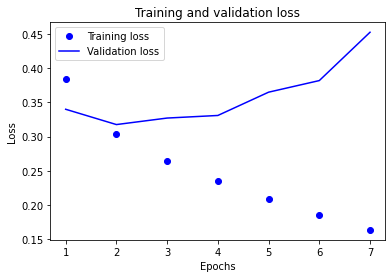

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

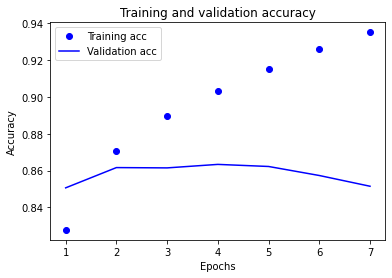

In [ ]:
plt.clf()   

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

###학습된 임베딩 레이어


In [ ]:
embedding_layer = LSTM_model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)

(10000, 16)


In [ ]:
!pip install gensim

!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1ElQrFswdxYsZyEXIxhN0Us2vbJNMIZwK" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1ElQrFswdxYsZyEXIxhN0Us2vbJNMIZwK" -o wiki_20190620_small.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   683  100   683    0     0   4435      0 --:--:-- --:--:-- --:--:--  4435
100  115k    0  115k    0     0   597k      0 --:--:-- --:--:-- --:--:--  597k


In [ ]:
word2vec_file_path = '/content/drive/MyDrive/LMS/film_review/wiki_20190620_small.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))

vectors = LSTM_model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [ ]:
word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['사과']
vector

array([ 0.1107634 , -0.57663804, -0.01351999, -0.29291138,  0.07818841,
        0.09619034,  0.24017058,  0.10063644,  0.00916606, -0.23407896,
       -0.06948208,  0.01320128,  0.02453666,  0.02601137, -0.02367757,
       -0.05550727], dtype=float32)

In [ ]:
word_vectors.similar_by_word("동의")

[('말리', 0.9184073805809021),
 ('거기', 0.895789623260498),
 ('파탄', 0.8877254724502563),
 ('어줍잖', 0.8823180198669434),
 ('의도', 0.8793677091598511),
 ('걸친', 0.8784265518188477),
 ('압축', 0.8767814040184021),
 ('끔찍', 0.875941276550293),
 ('어째', 0.8745017051696777),
 ('평이', 0.8738136291503906)]

###한국어 Word2Vec 임베딩 레이어

In [ ]:
word2vec_file_path = '/content/drive/MyDrive/LMS/film_review/ko/ko.bin'
word2vec = gensim.models.Word2Vec.load(word2vec_file_path)

In [ ]:
vector = word2vec['사과']
vector

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 9.2056787e-01, -9.3060774e-01,  5.4439580e-01, -1.3935467e+00,
        5.3978199e-01, -8.0385113e-01,  7.6022381e-01,  9.4473548e-02,
       -1.9885937e+00, -1.4190671e+00, -7.1797468e-02, -5.1517338e-01,
        1.2117706e-01,  3.8250095e-01, -1.2753999e-01, -9.3050337e-01,
        7.6219708e-01, -4.3545979e-01, -1.6027944e-02,  5.4516089e-01,
        1.0358979e-01, -2.1163979e-01, -7.4997252e-01, -2.6998541e-01,
        1.1858349e+00, -8.4951085e-01, -3.6378971e-01, -1.2847933e+00,
       -1.0035210e+00, -6.3335228e-01,  5.7869136e-01, -2.8867555e-01,
       -2.2565665e+00,  1.9307016e-01,  1.1739066e+00, -1.2930912e+00,
        1.0477116e+00, -1.0863464e+00, -1.0862664e+00,  1.0688077e+00,
       -1.3563226e+00, -2.8415608e-01, -1.7860498e-01, -1.7332597e+00,
        1.2366999e+00, -2.0593180e-01,  6.3037866e-01, -2.7050629e+00,
        7.1303926e-02,  9.8375821e-01, -4.9528290e-02,  1.9433835e-01,
        3.8230199e-01, -2.3899893e-01, -5.0880301e-01, -5.5829966e-01,
      

In [ ]:
word2vec.similar_by_word("동의")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('찬성', 0.47488462924957275),
 ('양해', 0.4586007595062256),
 ('찬동', 0.4416826665401459),
 ('협의', 0.434848427772522),
 ('합의', 0.43081700801849365),
 ('승낙', 0.4255688488483429),
 ('승인', 0.42273956537246704),
 ('반대', 0.4167338013648987),
 ('통지', 0.40472936630249023),
 ('협조', 0.3948354721069336)]

In [ ]:
vocab_size = 10000
word_vector_dim = 200

embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
vocab_size = 10000    
word_vector_dim = 200  

word2vec_LSTM_model = keras.Sequential()
word2vec_LSTM_model.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),
                                 input_length=text_max_len, 
                                 trainable=True))
word2vec_LSTM_model.add(keras.layers.LSTM(64))
word2vec_LSTM_model.add(keras.layers.Dense(256, activation='relu'))
word2vec_LSTM_model.add(keras.layers.Dense(1, activation='sigmoid'))  

word2vec_LSTM_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 41, 200)           2000000   
                                                                 
 lstm_3 (LSTM)               (None, 64)                67840     
                                                                 
 dense_16 (Dense)            (None, 256)               16640     
                                                                 
 dense_17 (Dense)            (None, 1)                 257       
                                                                 
Total params: 2,084,737
Trainable params: 2,084,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
word2vec_LSTM_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20 

early = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
check = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_bast_only=True)

history = word2vec_LSTM_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    callbacks=[early, check],
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
3624/3631 [============================>.] - ETA: 0s - loss: 0.3869 - accuracy: 0.8236
Epoch 1: saving model to best_model.h5
3631/3631 [==============================] - 30s 8ms/step - loss: 0.3871 - accuracy: 0.8236 - val_loss: 0.3351 - val_accuracy: 0.8580
Epoch 2/20
3629/3631 [============================>.] - ETA: 0s - loss: 0.2927 - accuracy: 0.8760
Epoch 2: saving model to best_model.h5
3631/3631 [==============================] - 28s 8ms/step - loss: 0.2928 - accuracy: 0.8760 - val_loss: 0.3166 - val_accuracy: 0.8644
Epoch 3/20
3625/3631 [============================>.] - ETA: 0s - loss: 0.2502 - accuracy: 0.8961
Epoch 3: saving model to best_model.h5
3631/3631 [==============================] - 28s 8ms/step - loss: 0.2502 - accuracy: 0.8961 - val_loss: 0.3173 - val_accuracy: 0.8667
Epoch 4/20
3629/3631 [============================>.] - ETA: 0s - loss: 0.2112 - accuracy: 0.9139
Epoch 4: saving model to best_model.h5
3631/3631 [==============================] - 28s 8

In [ ]:
results = word2vec_LSTM_model.evaluate(x_test,  y_test, verbose=2)

print(results)

1537/1537 - 4s - loss: 0.4973 - accuracy: 0.8537 - 4s/epoch - 3ms/step
[0.4972745180130005, 0.8536932468414307]


##BiLSTM with Attention mechanism

In [ ]:
x_train_tensor = tf.convert_to_tensor(x_train)
y_train_tensor = tf.convert_to_tensor(y_train)
x_val_tensor = tf.convert_to_tensor(x_val)
y_val_tensor = tf.convert_to_tensor(y_val)

In [ ]:
BiLSTM_model.compile(loss='binary_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

history = BiLSTM_model.fit(x_train_tensor, y_train_tensor,
                           epochs = 3,
                           batch_size = 256,
                           validation_data = (x_val_tensor, y_val_tensor),
                           verbose=1)

Epoch 1/3
572/572 [==============================] - 246s 396ms/step - loss: 0.4117 - accuracy: 0.8200 - val_loss: 0.2981 - val_accuracy: 0.8749
Epoch 2/3
572/572 [==============================] - 243s 425ms/step - loss: 0.3303 - accuracy: 0.8639 - val_loss: 0.2684 - val_accuracy: 0.8868
Epoch 3/3
572/572 [==============================] - 217s 380ms/step - loss: 0.3001 - accuracy: 0.8773 - val_loss: 0.2381 - val_accuracy: 0.9009


In [ ]:
print("\n 테스트 정확도: %.4f" % (BiLSTM_model.evaluate(x_test, y_test)[1]))

1537/1537 [==============================] - 76s 49ms/step - loss: 0.3260 - accuracy: 0.8600

 테스트 정확도: 0.8600


In [ ]:
history_dict = history.history
print(history_dict.keys()) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


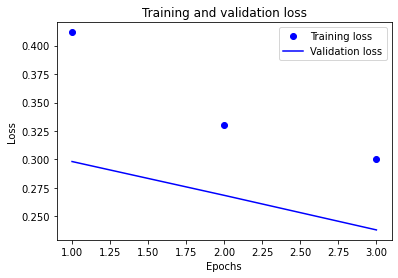

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

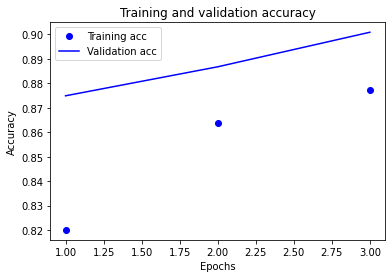

In [ ]:
plt.clf()   

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

##Transformer

In [ ]:
x_train_tensor = tf.convert_to_tensor(x_train)
y_train_tensor = tf.convert_to_tensor(y_train)
x_val_tensor = tf.convert_to_tensor(x_val)
y_val_tensor = tf.convert_to_tensor(y_val)

In [ ]:
Transformer_model.compile("adam",
                          "sparse_categorical_crossentropy",
                          metrics=["accuracy"])

history = Transformer_model.fit(x_train_tensor,
                                y_train_tensor,
                                batch_size=32,
                                epochs=3,
                                validation_data = (x_val_tensor, y_val_tensor))

Epoch 1/3
4569/4569 [==============================] - 44s 9ms/step - loss: 0.3826 - accuracy: 0.8265 - val_loss: 0.3245 - val_accuracy: 0.8552
Epoch 2/3
4569/4569 [==============================] - 42s 9ms/step - loss: 0.3244 - accuracy: 0.8580 - val_loss: 0.2830 - val_accuracy: 0.8766
Epoch 3/3
4569/4569 [==============================] - 42s 9ms/step - loss: 0.3057 - accuracy: 0.8661 - val_loss: 0.2681 - val_accuracy: 0.8821


In [ ]:
print("테스트 정확도: %.4f" % (Transformer_model.evaluate(x_test, y_test)[1]))

1537/1537 [==============================] - 7s 5ms/step - loss: 0.3573 - accuracy: 0.8484
테스트 정확도: 0.8484


In [ ]:
history_dict = history.history
print(history_dict.keys()) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


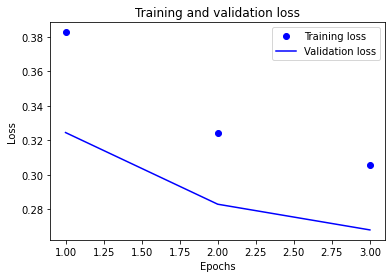

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

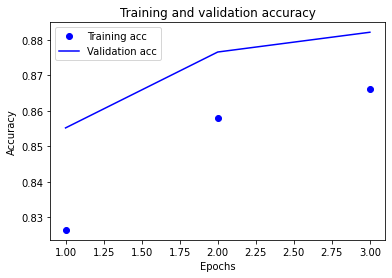

In [ ]:
plt.clf()   

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#결론

**Text Classification 모델 분석**

* LSTM 모델
<br/>train_loss: 0.1634 - train_accuracy: 0.9351
<br/>val_loss: 0.4528 - val_accuracy: 0.8515
<br/>test_loss: 0.4591 - test_accuracy: 0.8469


* 한국어 Word2Vec을 활용한 LSTM 모델
<br/>train_loss: 0.1111 - train_accuracy: 0.9573
<br/>val_loss: 0.5023 - val_accuracy: 0.8576
<br/>test_loss: 0.4973 - test_accuracy: 0.8537


* 양방향 LSTM과 어텐션 메커니즘을 결합한 모델
<br/>train_loss: 0.3001 - train_accuracy: 0.8773
<br/>val_loss: 0.2381 - val_accuracy: 0.9009
<br/>test_loss: 0.3260 - test_accuracy: 0.8600

* 트랜스포머 모델
<br/>train_loss: 0.3057 - train_accuracy: 0.8661
<br/>val_loss: 0.2681 - val_accuracy: 0.8821
<br/>test_loss: 0.3573 - test_accuracy: 0.8484

양방향 LSTM과 어텐션 메커니즘을 결합한 모델은 가장 성능이 높고
<br/>과적합 문제가 2번째로 적은 편이다.

**자체학습한 임베딩과 사전학습 임베딩 레이어 분석**

* 자체 학습된 임베딩 레이어
<br/>'동의'와 가장 유사성이 높은 단어는
<br/>'말리, '거기', '파탄', '어줍잖', '의도', '걸친', '압축', '끔찍', '어째', '평이'이다.

* 사전학습 한국어 Word2Vec 임베딩 레이어
<br/>'동의'와 가장 유사성이 높은 단어는
<br/>'찬성', '양해', '찬동', '협의', '합의', '승낙', '승인', '반대', '통지', '협조'이다.


모델에 의해 예측된 유사어와 실제 유사어의 의미를 고려했을 때
<br/>사전학습된 한국어 Word2Vec 임베딩 레이어 모델이 성능이 더 높은 것으로 보인다.

#참고문헌

**단행본**
<br/>전창욱, 최태균, 조중현, 신성진, 『텐서플로2와 머신러닝으로 시작하는 자연어 처리』, 위키북스, 2020.
<br/>[자연어 처리 예제 저장소](https://github.com/NLP-kr/tensorflow-ml-nlp-tf2)
<br/><br/>이기창, 『한국어 임베딩』, 에이콘출판사, 2019.
<br/>[한국어 임베딩 관련 튜토리얼 페이지](https://ratsgo.github.io/embedding/)
<br/>[RNN과 LSTM을 이해해보자!](https://ratsgo.github.io/natural%20language%20processing/2017/03/09/rnnlstm/)
<br/><br/>비슈누 수브라마니안 저, PyTorch로 시작하는 딥 러닝 입문, 김태완 옮긴이, 에이콘출판사, 2019
<br/>[IMDB 리뷰 감성 분류하기(IMDB Movie Review Sentiment Analysis)](https://wikidocs.net/60691)
<br/><br/>유원준 외 1명, 딥러닝을 이용한 자연어 처리 입문, wikidocs, 2022
<br/>[어텐션 메커니즘 (Attention Mechanism)](https://wikidocs.net/22893)
<br/>[양방향 LSTM과 어텐션 메커니즘(BiLSTM with Attention mechanism](https://wikidocs.net/48920)
<br/>[트랜스포머(Transformer)](https://wikidocs.net/31379)
<br/>[셀프 어텐션을 이용한 텍스트 분류(Multi-head Self Attention for Text Classification)](https://wikidocs.net/103802)
<br/><br/>사이토 고키 저, 밑바닥부터 시작하는 딥러닝2, 개앞맵시 옮긴이, 2019, 한빛미디어
<br/>[Ch 08 어텐션 (2) 양방향 LSTM](https://wegonnamakeit.tistory.com/25)

<br/>**논문**
<br/>[박은정, 조성준, 「KoNLPy: 쉽고 간결한 한국어 정보처리 파이썬 패키지”, 제 26회 한글 및 한국어 정보처리 학술대회 논문집」, 2014.](https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=NPAP12013363&dbt=NPAP)

<br/>**공식 사이트**
<br/>[은전한닢 프로젝트 : mecab-ko-dic](https://bitbucket.org/eunjeon/mecab-ko-dic/src/master/)
<br/>[은전한닢 프로젝트를 소개합니다](http://eunjeon.blogspot.com/2013/02/blog-post.html)
<br/>[케라스 코리아 : 초기화 함수 사용법Usage of initializers](https://github.com/keras-team/keras-docs-ko/blob/master/sources/initializers.md)
<br/>[genism : What is Gensim?](https://radimrehurek.com/gensim/intro.html)
<br/>[genism : models.keyedvectors](https://radimrehurek.com/gensim/models/keyedvectors.html)
<br/>[Naver D2 : Data Loader, Better, Faster, Stronger](https://d2.naver.com/helloworld/3773258)

<br/>**깃허브**
<br/>[03.01.02 KoNLPy 한국어 처리 패키지.ipynb](https://github.com/datascienceschool/book/blob/master/ds/03%20machine%20learning/03.01.02%20KoNLPy%20%ED%95%9C%EA%B5%AD%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.ipynb)

<br/>**웹사이트**
<br/>[ML Tensorflow 와 Keras 간단 비교](https://wooono.tistory.com/77)
<br/>[Tensorflow와 Keras의 관계](https://89douner.tistory.com/279)
<br/>[케라스 콜백 함수. EarlyStopping. ModelCheckpoint](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=baek2sm&logNo=222013688414)
<br/>[Python 모듈 버전 확인](https://www.delftstack.com/ko/howto/python/module-version-python/)
<br/>[한글 토크나이징 라이브러리](https://monetd.github.io/python/nlp/%ED%95%9C%EA%B8%80-%ED%86%A0%ED%81%AC%EB%82%98%EC%9D%B4%EC%A7%95-%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC/)
<br/>[한국어 형태소 분석기 비교 (지도학습기반)](https://www.blog.cosadama.com/articles/2021-practicenlp-01/)
<br/>[Colab에서 Mecab 사용하기](https://sosomemo.tistory.com/72)
<br/>[Mac OS 자연어처리를 위한 패키지 설치 - MeCab, KoNLPy, eKoNLPy](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=yejin7676&logNo=222024761669)
<br/>[MeCab를 이용한 한국어 형태소 분석](https://porocise.sakura.ne.jp/wiki/korean/mecab.ko)
<br/>[형태소 분석 '은전한닢' 프로젝트와 MeCab(메카브)](https://eond.com/seo/361286)
<br/>[패키지 설치 방법 윈도우10(Window10)에서 Mecab 형태소 분석기를 설치하고 사용하는 방법 (feat. 파이썬)](https://doitgrow.com/39)
<br/>["JDK란 무엇인가" 자바 개발 키트 소개와 설치하기](https://www.itworld.co.kr/news/110817)
<br/>[Python JPype로 Java 라이브러리 가져다 쓰기](https://oboki.net/workspace/python/jpype%EB%A1%9C-java-%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC-%EA%B0%80%EC%A0%B8%EB%8B%A4-%EC%93%B0%EA%B8%B0/)
<br/>[MeCab 형태소 분석기](https://euriion.com/?p=413074)
<br/>[NODE JS mecab-ko 특정 품사의 단어들을 추출](https://teeeeeeemo.tistory.com/27)
<br/>[노리(Nori) 형태소 분석기 Deep Dive](https://gritmind.blog/2020/07/22/nori_deep_dive/)
<br/>[Large Movie Review Dataset](https://ai.stanford.edu/~amaas/data/sentiment/)
<br/>[한국어 형태소 분석기(POS) 분석 - 1편. 역사](https://velog.io/@metterian/%ED%95%9C%EA%B5%AD%EC%96%B4-%ED%98%95%ED%83%9C%EC%86%8C-%EB%B6%84%EC%84%9D%EA%B8%B0POS-%EB%B6%84%EC%84%9D-%EB%B0%8F-%EC%B0%A8%EC%9D%B4%EC%A0%90-1%ED%8E%B8.-%EC%97%AD%EC%82%AC)
<br/>[한국어 형태소 분석기(POS) 분석 - 3편. 형태소 분석기 비교](https://velog.io/@metterian/%ED%95%9C%EA%B5%AD%EC%96%B4-%ED%98%95%ED%83%9C%EC%86%8C-%EB%B6%84%EC%84%9D%EA%B8%B0POS-%EB%B6%84%EC%84%9D-3%ED%8E%B8.-%ED%98%95%ED%83%9C%EC%86%8C-%EB%B6%84%EC%84%9D%EA%B8%B0-%EB%B9%84%EA%B5%90)
<br/>[쿼리(query)란 무엇인가?](https://hengbokhan.tistory.com/133)
<br/>[파이썬 - 기본을 갈고 닦자! : for in 반복문, Range, enumerate](https://wikidocs.net/16045)
<br/>[How to convert a numpy array to tensor](https://www.projectpro.io/recipes/convert-numpy-array-tensor)
<br/>[자연어처리, 워드임베딩 (Word2Vec, FastText , GloVe 예제)(2)](https://jh2021.tistory.com/6)